In [11]:
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

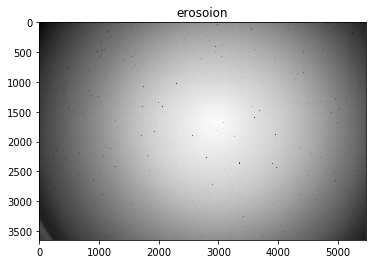

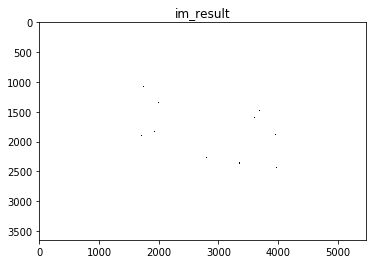

In [38]:
path='C:\\Users\\perry\\image_process_class\\W_A1_0_3.jpg'
#Image type，並轉灰階
im_gray=cv2.imread(path,0)
#做colsing
kernel_dilation=np.ones((5,5),np.uint8)
dilation=cv2.dilate(im_gray,kernel_dilation)
kernel_erosion=np.ones((3,3),np.uint8)
erosoion=cv2.erode(dilation,kernel_erosion)

cv2.imwrite('C:\\Users\\perry\\image_process_class\\closing.jpg',erosoion)
plt.imshow(erosoion,cmap='gray')
plt.title('erosoion')
plt.show()

#做自適應二值化
erosion_gray=cv2.imread('C:\\Users\\perry\\image_process_class\\closing.jpg',0)
im_adaptive=cv2.adaptiveThreshold(erosion_gray,255,
                                  cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                  cv2.THRESH_BINARY,5,3)
kernel_dilation=np.ones((3,3),np.uint8)
dilation=cv2.dilate(im_adaptive,kernel_dilation)

kernel_erosion=np.ones((3,3),np.uint8)
im_result=cv2.erode(dilation,kernel_erosion)

cv2.imwrite('C:\\Users\\perry\\image_process_class\\im_result.jpg',im_result)
plt.imshow(im_result,cmap='gray')
plt.title('im_result')
plt.show()

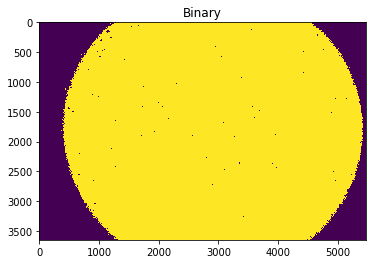

In [15]:
path='C:\\Users\\perry\\image_process_class\\W_A1_0_3.jpg'
#Image type，並轉灰階
im_gray=cv2.imread(path,0)
#做colsing
k=np.ones((3,3),np.uint8)
result1=cv2.morphologyEx(im_gray,cv2.MORPH_CLOSE,k,iterations=3)




im_gray_arr=np.array(im_gray)
heigh,width=im_gray.shape


ss=[]
for i in range(heigh):
    for j in range(width):
#         temp=img_gray.getpixel(x,y) #getpixel 取出每個pixel 
        z=im_gray_arr[i][j]
        if z > 75:
            z=255
        else:
            z=0
        ss.append(z)

ary = np.array(ss) #將二值後的資料轉Array
# numpy轉image & show 二值化的圖
im_result=ary.reshape(heigh, width)

#存檔
cv2.imwrite('C:\\Users\\perry\\image_process_class\\reglst.jpg',im_result)
plt.imshow(im_result,cmap='gray')
plt.title('Binary')
plt.show()

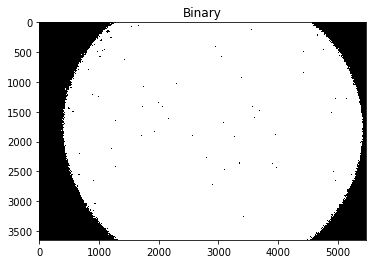

In [9]:
# # image轉cv2
# cv2_img = cv2.cvtColor(np.asarray(pic),cv2.COLOR_RGB2BGR)
img=cv2.imread('C:\\Users\\perry\\image_process_class\\result.png')

kernel = np.ones((1,1), np.uint8)
#膨脹
dilation = cv2.dilate(img, kernel, iterations = 1)
#侵蝕
erosion = cv2.erode(img, kernel, iterations = 1)
#存檔
plt.imsave('dilation.png',dilation)
#存檔
plt.imsave('erosion.png',erosion)
plt.imshow(erosion)
plt.title('Binary')
plt.show()